# BOOMBIKES ASSIGNMENT
## Problem Statement

* A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

* A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

* In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

* They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
  How well those variables describe the bike demands
  Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily   bike demands across the American market based on some factors.
  
## Business Goal

* We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
# Reading the dataset
boomBikes = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
boomBikes.shape

(730, 16)

#### Handling missing values are not required because none of the columns have null values.

In [7]:
boomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data cleaning

* We don't observe "instant" column usage while bike selection by users . so, we can drop the column from the dataset

In [8]:
boomBikes.drop('instant', axis=1, inplace=True)

* The demand for shared bikes is in the American market. The main aim is to identify factors on which demand for shared bikes depends. So, dropping off these "Casual and Registered" Columns from the dataset.

In [9]:
boomBikes.drop(['casual', 'registered'], axis=1, inplace=True)

* Date Records are not required because they are not much required for analysis. So, dropping off these columns.

In [10]:
boomBikes.drop(['dteday'], axis=1, inplace=True)

* Cross checking the columns

In [12]:
boomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


* Replacing the season & weathersit values with their original categorical values for better understanding the results.

In [13]:
boomBikes['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)

In [14]:
boomBikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
boomBikes['weathersit'].replace({1:'Partly_cloudy', 2:'Mist_cloudy', 3:'low_rain', 4:'heavy_rain'},inplace=True)

In [16]:
boomBikes['weathersit'].value_counts()

Partly_cloudy    463
Mist_cloudy      246
low_rain          21
Name: weathersit, dtype: int64

In [17]:
boomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
boomBikes['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',
                         8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
boomBikes['weekday'].replace({0:'Sunday',1:'Monday', 2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)
boomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Partly_cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Partly_cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Partly_cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
boomBikes.weekday.value_counts().sort_index()

Friday       104
Monday       105
Saturday     105
Sunday       105
Thursday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

### Step 3: Data Visualization
* We'll visualise our data using matplotlib and seaborn.

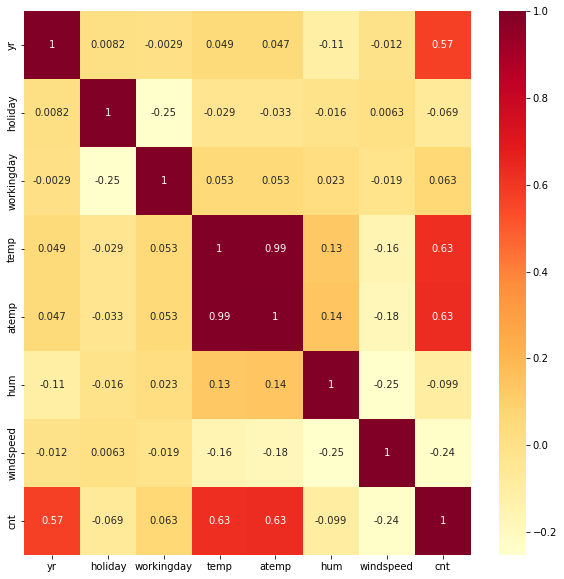

In [20]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(boomBikes.corr(), cmap="YlOrRd", annot = True)
plt.show()

* From the heatmap, temp and atemp are highly correlated with each other so, we can remove temp from the dataset.

In [21]:
boomBikes.drop('temp', axis=1, inplace=True)

In [22]:
boomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Partly_cloudy,11.46350,43.6957,12.522300,1600


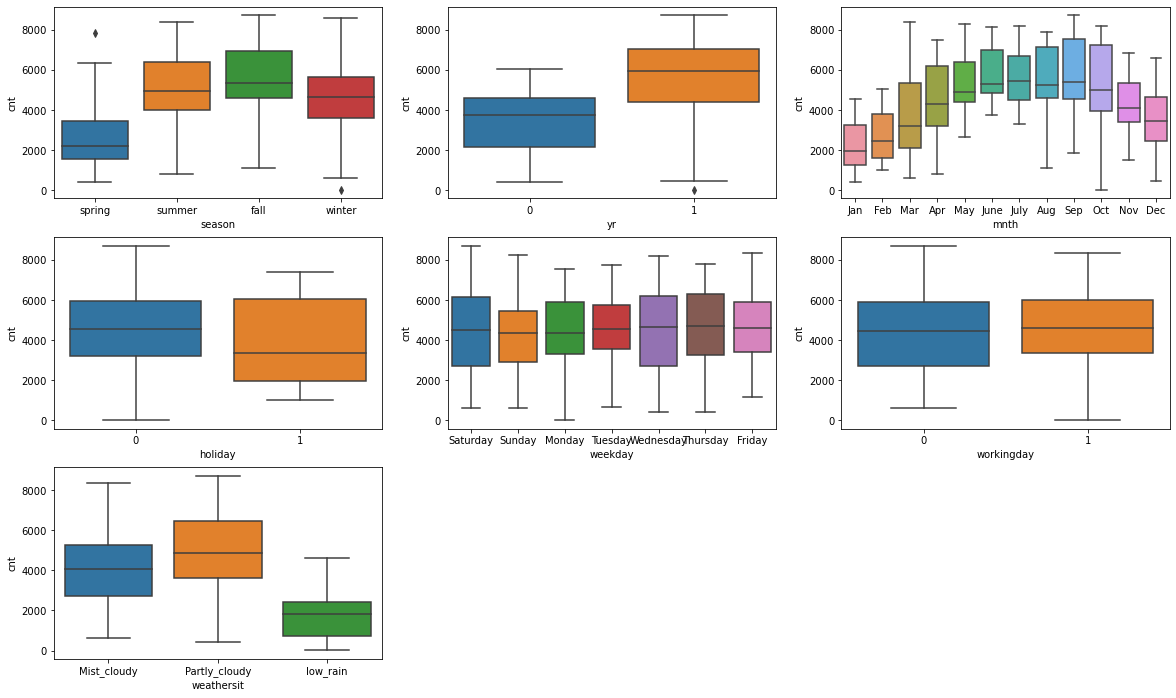

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boomBikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boomBikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boomBikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boomBikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boomBikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boomBikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boomBikes)
plt.show()

#### The above plot shows the relationship between categorical variables.

* Bike Rentals are more during the Fall season and then in summer
* Number of users are increased from 2018 to 2019
* Bike Rentals are more in partly cloudy weather
* Bike Rentals are more on Saturday,wednesday and thursday

In [24]:
boomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Partly_cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Partly_cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Partly_cloudy,11.46350,43.6957,12.522300,1600


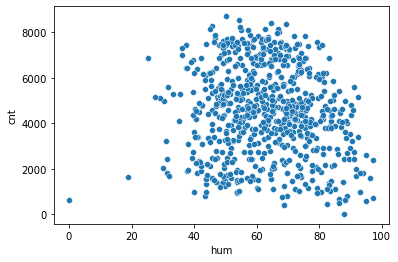

In [25]:
#scatter plot for temperature to count
sns.scatterplot(x='hum', y='cnt',data=boomBikes)
plt.show()

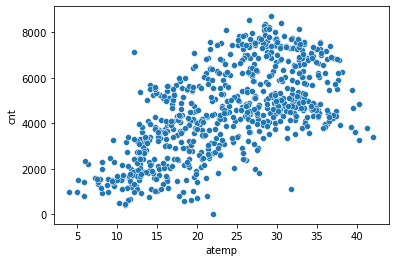

In [26]:
#scatter plot for temperature to count
sns.scatterplot(x='atemp',y='cnt' ,data=boomBikes)
plt.show()

### Step 4: Data Preparation
Converting season, weathersit, weekday, mnth variables into integer for our analysis

In [27]:
season_category = pd.get_dummies(boomBikes['season'], drop_first=True)

# Check what the dataset 'status' looks like
season_category.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
weather_category = pd.get_dummies(boomBikes['weathersit'], drop_first=True)

# Check what the dataset 'status' looks like
weather_category.head()

,Partly_cloudy,low_rain
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [29]:
week_category = pd.get_dummies(boomBikes['weekday'], drop_first=True)

# Check what the dataset 'status' looks like
week_category.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [30]:
month_category = pd.get_dummies(boomBikes['mnth'], drop_first=True)

# Check what the dataset 'status' looks like
month_category.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
boomBikes = pd.concat([boomBikes, season_category,weather_category, week_category,month_category ], axis=1)

In [32]:
# Check the bikes dataframe now

boomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,Partly_cloudy,low_rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Monday,1,Partly_cloudy,9.47025,43.7273,16.636703,1349,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Partly_cloudy,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,Partly_cloudy,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [33]:
#Check the columns in the dataframe

boomBikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Partly_cloudy', 'low_rain', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [34]:
#Dropping season,mnth,weekday,weathersit as we have already created dummy variables for it.
boomBikes.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

In [35]:
# Cross check the data
boomBikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Partly_cloudy,low_rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


### Categorize the Data into Training and Testing Sets. Our first step is Train-Test split

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boomBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Partly_cloudy,low_rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Rescaling the Features In Simple Linear Regression, scaling doesn't impact your model.In the dataset we can observe that atemp, hum, windspeed, cnt are spread across different scales. So, it is important to scale variables to get comparable scale. We can use standardization or normalization to check the scaling.

#### Two ways of scaling are as below :

* Min-Max scaling Standardisation (mean-0, sigma-1) We will use MinMax scaling in our scenario.

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
# List of numeric variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Partly_cloudy,low_rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* Dividing into X and Y sets for the model building

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Partly_cloudy,low_rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 5: Building a linear model

we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

* RFE
  Recursive feature elimination

In [45]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Partly_cloudy', True, 1),
 ('low_rain', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 7),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [47]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'Partly_cloudy', 'low_rain', 'Saturday', 'Dec', 'Jan', 'July', 'Nov',
       'Sep'],
      dtype='object')

### Building model using statsmodel

In [48]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [51]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          9.67e-187
Time:                        10:51:57   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3079      0.036      8.565      0.000       0.237       0.379
yr                0.2326      0.008     28.490      0.000       0.217       0.249
holiday          -0.0841      0.026     -3.243      0.001      -0.135      -0.033
atemp             0.4470      0.035     12.826      0.000       0.379       0.515
hum              -0.1477      0.038     -3.874      0.000      -0.223      -0.073
windspeed        -0.1692      0.026     -6.498      0.000      -0.220      -0.118
spring           -0.1070      0.015     -6.974      0.000      -0.137      -0.077
winter            0.0662      0.014      4.703      0.000       0.039       0.094
Partly_cloudy     0.0582      0.011      5.501      0.000       0.037       0.079
low_rain         -0.1922      0.025     -7.610      0.000      -0.242      -0.143
Saturday          0.0182      0.011      1.627      0.104      -0.004       0.040
Dec              -0.0485      0.017     -2.791      0.005      -0.083      -0.014
Jan              -0.0515      0.018     -2.836      0.005      -0.087      -0.016
July             -0.0679      0.017     -3.935      0.000      -0.102      -0.034
Nov              -0.0502      0.019     -2.689      0.007      -0.087      -0.014
Sep               0.0586      0.016      3.751      0.000       0.028       0.089
==============================================================================
Omnibus:                       73.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.568
Skew:                          -0.724   Prob(JB):                     9.28e-43
Kurtosis:                       5.648   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the summary the holiday has high P-value which indicates this feature is insignifact, so dropping it from the dataset

In [52]:
X_train_rfe.drop('holiday', axis=1, inplace=True)
# X_train_reg1.head()

In [53]:
X_train_reg1 = sm.add_constant(X_train_rfe)
lm_reg1 = sm.OLS(y_train,X_train_reg1).fit()   # Running the linear model
lm_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.24e-185
Time:                        10:52:38   Log-Likelihood:                 503.47
No. Observations:                 510   AIC:                            -976.9
Df Residuals:                     495   BIC:                            -913.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3089      0.036      8.512      0.000       0.238       0.380
yr                0.2330      0.008     28.267      0.000       0.217       0.249
atemp             0.4465      0.035     12.691      0.000       0.377       0.516
hum              -0.1485      0.038     -3.857      0.000      -0.224      -0.073
windspeed        -0.1707      0.026     -6.496      0.000      -0.222      -0.119
spring           -0.1095      0.015     -7.077      0.000      -0.140      -0.079
winter            0.0661      0.014      4.654      0.000       0.038       0.094
Partly_cloudy     0.0568      0.011      5.319      0.000       0.036       0.078
low_rain         -0.1905      0.025     -7.474      0.000      -0.241      -0.140
Saturday          0.0207      0.011      1.839      0.066      -0.001       0.043
Dec              -0.0494      0.018     -2.816      0.005      -0.084      -0.015
Jan              -0.0525      0.018     -2.865      0.004      -0.089      -0.017
July             -0.0670      0.017     -3.851      0.000      -0.101      -0.033
Nov              -0.0572      0.019     -3.059      0.002      -0.094      -0.020
Sep               0.0549      0.016      3.490      0.001       0.024       0.086
==============================================================================
Omnibus:                       85.097   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.631
Skew:                          -0.810   Prob(JB):                     4.13e-52
Kurtosis:                       5.917   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
X_train_reg1.drop('const', axis=1, inplace=True)

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,19.59
1,atemp,19.41
3,windspeed,4.15
6,Partly_cloudy,3.29
4,spring,3.08
5,winter,2.98
0,yr,2.06
12,Nov,1.81
10,Jan,1.76
9,Dec,1.56


#### From the VIF table, hum feature has high VIF value. Which Indicates insignificant. so let's drop const and rebuild the model

In [56]:
X_train_reg1.drop('hum', axis=1, inplace=True)

In [57]:
X_train_reg2 = sm.add_constant(X_train_reg1)
lm_reg2 = sm.OLS(y_train, X_train_reg2).fit()

In [58]:
#Let's see the summary of our linear model
print(lm_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.29e-183
Time:                        10:54:12   Log-Likelihood:                 495.92
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2088      0.026      8.118

In [59]:
X_train_reg2.drop('const', axis=1, inplace=True)

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.31
2,windspeed,4.01
5,Partly_cloudy,2.85
4,winter,2.54
3,spring,2.42
0,yr,2.06
11,Nov,1.78
9,Jan,1.63
8,Dec,1.46
10,July,1.34


In [61]:
X_train_reg3 = sm.add_constant(X_train_reg2)
lm_reg3 = sm.OLS(y_train,X_train_reg3).fit()

In [62]:
lm_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.29e-183
Time:                        10:54:41   Log-Likelihood:                 495.92
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2088      0.026      8.118      0.000       0.158       0.259
yr                0.2366      0.008     28.493      0.000       0.220       0.253
atemp             0.4119      0.034     11.942      0.000       0.344       0.480
windspeed        -0.1455      0.026     -5.639      0.000      -0.196      -0.095
spring           -0.1121      0.016     -7.154      0.000      -0.143      -0.081
winter            0.0576      0.014      4.049      0.000       0.030       0.086
Partly_cloudy     0.0805      0.009      9.103      0.000       0.063       0.098
low_rain         -0.2083      0.025     -8.194      0.000      -0.258      -0.158
Saturday          0.0231      0.011      2.025      0.043       0.001       0.045
Dec              -0.0551      0.018     -3.108      0.002      -0.090      -0.020
Jan              -0.0578      0.019     -3.118      0.002      -0.094      -0.021
July             -0.0594      0.018     -3.388      0.001      -0.094      -0.025
Nov              -0.0568      0.019     -2.993      0.003      -0.094      -0.020
Sep               0.0516      0.016      3.243      0.001       0.020       0.083
==============================================================================
Omnibus:                       87.899   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.424
Skew:                          -0.843   Prob(JB):                     1.02e-52
Kurtosis:                       5.902   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_train_reg3.drop('const', axis=1, inplace=True)

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.31
2,windspeed,4.01
5,Partly_cloudy,2.85
4,winter,2.54
3,spring,2.42
0,yr,2.06
11,Nov,1.78
9,Jan,1.63
8,Dec,1.46
10,July,1.34


* 'Saturday' Feature has high p-value, let's drop the feature from dataset and rebuild the model

In [66]:
X_train_reg3.drop('Saturday', axis=1, inplace=True)

In [67]:
X_train_reg4 = sm.add_constant(X_train_reg3)
lm_reg4 = sm.OLS(y_train, X_train_reg4).fit()
lm_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.75e-184
Time:                        10:56:02   Log-Likelihood:                 493.82
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     497   BIC:                            -906.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2122      0.026      8.242      0.000       0.162       0.263
yr                0.2361      0.008     28.358      0.000       0.220       0.252
atemp             0.4109      0.035     11.878      0.000       0.343       0.479
windspeed        -0.1430      0.026     -5.531      0.000      -0.194      -0.092
spring           -0.1122      0.016     -7.141      0.000      -0.143      -0.081
winter            0.0580      0.014      4.064      0.000       0.030       0.086
Partly_cloudy     0.0804      0.009      9.054      0.000       0.063       0.098
low_rain         -0.2077      0.025     -8.147      0.000      -0.258      -0.158
Dec              -0.0539      0.018     -3.037      0.003      -0.089      -0.019
Jan              -0.0572      0.019     -3.078      0.002      -0.094      -0.021
July             -0.0588      0.018     -3.342      0.001      -0.093      -0.024
Nov              -0.0576      0.019     -3.025      0.003      -0.095      -0.020
Sep               0.0518      0.016      3.246      0.001       0.020       0.083
==============================================================================
Omnibus:                       81.722   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.568
Skew:                          -0.771   Prob(JB):                     3.15e-51
Kurtosis:                       5.927   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_train_reg4.drop('const', axis=1, inplace=True)

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.27
2,windspeed,3.98
5,Partly_cloudy,2.85
4,winter,2.53
3,spring,2.42
0,yr,2.06
10,Nov,1.78
8,Jan,1.63
7,Dec,1.46
9,July,1.34


* 'atemp' has high VIF, let's drop the feature from dataset and rebuild the model

In [71]:
X_train_reg4.drop('atemp', axis=1, inplace=True)

X_train_reg5 = sm.add_constant(X_train_reg4)
lm_reg4 = sm.OLS(y_train, X_train_reg5).fit()
lm_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.55e-158
Time:                        10:56:50   Log-Likelihood:                 430.10
No. Observations:                 510   AIC:                            -836.2
Df Residuals:                     498   BIC:                            -785.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4784      0.014     33.317      0.000       0.450       0.507
yr                0.2465      0.009     26.307      0.000       0.228       0.265
windspeed        -0.2051      0.029     -7.153      0.000      -0.261      -0.149
spring           -0.2191      0.015    -15.018      0.000      -0.248      -0.190
winter            0.0074      0.015      0.478      0.633      -0.023       0.038
Partly_cloudy     0.0884      0.010      8.825      0.000       0.069       0.108
low_rain         -0.2204      0.029     -7.644      0.000      -0.277      -0.164
Dec              -0.1084      0.019     -5.578      0.000      -0.147      -0.070
Jan              -0.1216      0.020     -6.037      0.000      -0.161      -0.082
July              0.0141      0.019      0.755      0.451      -0.023       0.051
Nov              -0.1043      0.021     -4.950      0.000      -0.146      -0.063
Sep               0.0749      0.018      4.174      0.000       0.040       0.110
==============================================================================
Omnibus:                       65.501   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.964
Skew:                          -0.684   Prob(JB):                     1.00e-33
Kurtosis:                       5.298   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_train_reg5.drop('const', axis=1, inplace=True)

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_reg5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.96
3,winter,2.52
4,Partly_cloudy,2.35
2,spring,2.32
0,yr,1.82
9,Nov,1.76
7,Jan,1.63
6,Dec,1.45
8,July,1.16
5,low_rain,1.12


* 'July' Feature has high p-value, let's drop the feature from dataset and rebuild the model

In [75]:
X_train_reg5.drop('July', axis=1, inplace=True)

X_train_reg6 = sm.add_constant(X_train_reg5)
lm_reg4 = sm.OLS(y_train, X_train_reg6).fit()
lm_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.40e-159
Time:                        10:58:34   Log-Likelihood:                 429.81
No. Observations:                 510   AIC:                            -837.6
Df Residuals:                     499   BIC:                            -791.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4808      0.014     34.348      0.000       0.453       0.508
yr                0.2465      0.009     26.319      0.000       0.228       0.265
windspeed        -0.2069      0.029     -7.248      0.000      -0.263      -0.151
spring           -0.2212      0.014    -15.473      0.000      -0.249      -0.193
winter            0.0053      0.015      0.349      0.727      -0.024       0.035
Partly_cloudy     0.0892      0.010      8.957      0.000       0.070       0.109
low_rain         -0.2194      0.029     -7.621      0.000      -0.276      -0.163
Dec              -0.1086      0.019     -5.595      0.000      -0.147      -0.070
Jan              -0.1217      0.020     -6.043      0.000      -0.161      -0.082
Nov              -0.1046      0.021     -4.965      0.000      -0.146      -0.063
Sep               0.0729      0.018      4.110      0.000       0.038       0.108
==============================================================================
Omnibus:                       65.753   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.235
Skew:                          -0.687   Prob(JB):                     8.76e-34
Kurtosis:                       5.297   Cond. No.                         9.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
X_train_lm = X_train_reg6.drop('const', axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.95
3,winter,2.48
2,spring,2.25
4,Partly_cloudy,2.23
0,yr,1.81
8,Nov,1.76
7,Jan,1.62
6,Dec,1.45
5,low_rain,1.11
9,Sep,1.09


* Residual Analysis of the train data
  So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [78]:
y_train_cnt = lm_reg4.predict(X_train_reg6)

Text(0.5, 0, 'Errors')

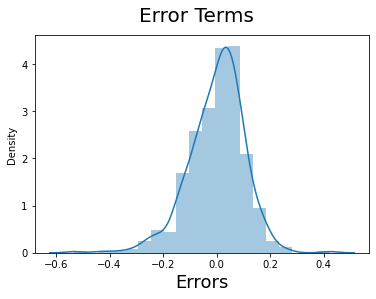

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [80]:
X_train_reg6.head()

,const,yr,windspeed,spring,winter,Partly_cloudy,low_rain,Dec,Jan,Nov,Sep
653,1.0,1,0.300794,0,1,1,0,0,0,0,0
576,1.0,1,0.264686,0,0,1,0,0,0,0,0
426,1.0,1,0.255342,1,0,0,0,0,0,0,0
728,1.0,1,0.663106,1,0,1,0,1,0,0,0
482,1.0,1,0.188475,0,0,0,0,0,0,0,0


In [81]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


Dividing into X_test and y_test

In [83]:
y_test = df_test.pop('cnt')
X_test = df_test

In [84]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [85]:
# Making predictions
y_pred = lm_reg4.predict(X_test_new)

####  Model Evaluation
* Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

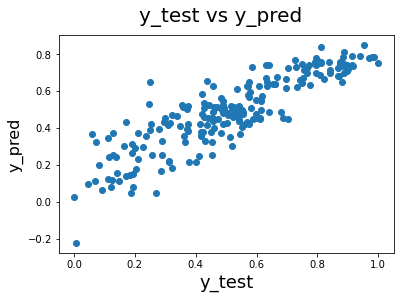

In [86]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [87]:
lm_reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.40e-159
Time:                        11:01:50   Log-Likelihood:                 429.81
No. Observations:                 510   AIC:                            -837.6
Df Residuals:                     499   BIC:                            -791.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4808      0.014     34.348      0.000       0.453       0.508
yr                0.2465      0.009     26.319      0.000       0.228       0.265
windspeed        -0.2069      0.029     -7.248      0.000      -0.263      -0.151
spring           -0.2212      0.014    -15.473      0.000      -0.249      -0.193
winter            0.0053      0.015      0.349      0.727      -0.024       0.035
Partly_cloudy     0.0892      0.010      8.957      0.000       0.070       0.109
low_rain         -0.2194      0.029     -7.621      0.000      -0.276      -0.163
Dec              -0.1086      0.019     -5.595      0.000      -0.147      -0.070
Jan              -0.1217      0.020     -6.043      0.000      -0.161      -0.082
Nov              -0.1046      0.021     -4.965      0.000      -0.146      -0.063
Sep               0.0729      0.018      4.110      0.000       0.038       0.108
==============================================================================
Omnibus:                       65.753   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.235
Skew:                          -0.687   Prob(JB):                     8.76e-34
Kurtosis:                       5.297   Cond. No.                         9.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We can see that the equation of our best fitted line is:

**𝑐𝑛𝑡=0.4808+0.2465×𝑦𝑟−0.2069×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑−0.2212×𝑠𝑝𝑟𝑖𝑛𝑔−0.0053×𝑤𝑖𝑛𝑡𝑒𝑟+0.0892×𝑃𝑎𝑟𝑡𝑙𝑦𝑐𝑙𝑜𝑢𝑑𝑦−0.2194×𝑙𝑜𝑤𝑟𝑎𝑖𝑛-0.1086*Dec−0.1217×𝐽𝑎𝑛-0.1046*Nov+0.0729×𝑆𝑒𝑝 . 
The model we have looks good but there may be possibilities to make it better**